In [1]:
import os
import sys
import numpy as np
sys.path.append('..')
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.feature import peak_local_max
from src.annotation.preprocess import preprocess
from src.utils.watershed_utils import get_markers
from omegaconf import OmegaConf

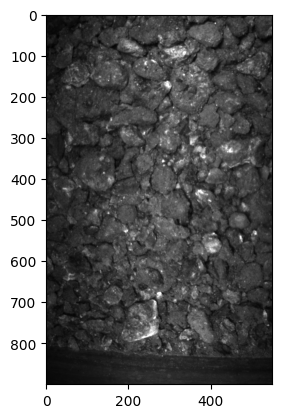

In [15]:
img = '../data/covdor/192.168.1.11_2024-12-07T16:42:23.png'
img = cv2.imread(img, 0)
plt.imshow(img, cmap='gray')

In [50]:
cfg = OmegaConf.load('../configs/watershed/watershed.yaml')

In [66]:
bin = preprocess(img, cfg.preprocess)
mkr = get_markers('all', bin)
distance_map = ndimage.distance_transform_edt(mkr)
local_max = peak_local_max(distance_map, min_distance=15, labels=mkr)
peak_mask = np.zeros(distance_map.shape, dtype=bool)
peak_mask[tuple(local_max.T)] = True

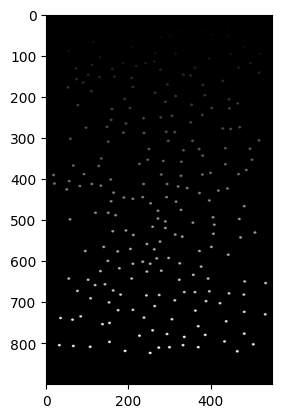

In [67]:
mask = peak_mask.astype(np.uint8) * 255

kernel_size = 7 
structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

big_mask = cv2.dilate(mask, structuring_element, iterations=1)

peak_markers = ndimage.label(big_mask)[0]
plt.imshow(peak_markers, cmap="gray")

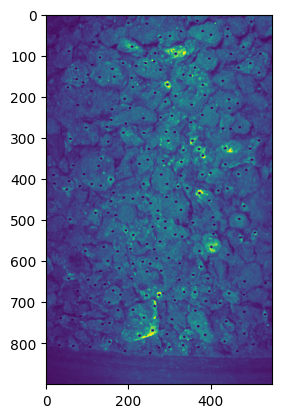

In [68]:
big_mask2 = cv2.dilate(big_mask, kernel=(3,3), iterations=3)
res = np.where(big_mask == 255, 0, img)

plt.imshow(res)